In [1]:
import pandas as pd
import numpy as np

fifa = pd.read_csv(r'../data/FIFA.csv',encoding='euc-kr')
fifa.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


1. FIFA 데이터에서 각 선수의 키는 Height변수에 피트로 인치로 입력되어 있습니다. 이를 cm로 변환하여 새로운 변수 Height_cm을 생성하시오.
("'" 앞의 숫자는 피트이며, "'" 뒤의 숫자는 인치, 1피트 = 30cm, 1인치 = 2.5cm)

In [2]:
def createcm(x):
    x_list = x.split("'")
    cm = int(x_list[0]) * 30 + int(x_list[1]) * 2.5
    return cm

In [3]:
fifa['Height_cm'] = fifa['Height'].apply(createcm)
fifa.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190.0
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,177.5


2. 포지션을 의미하는 Position 변수를 아래표를 참고하여 'Fowrward', 'Midfielder', 'Defender', 'GoalKeeper'로 재범주화하고, factor형으로 변환하여 Position_Class라는 변수를 생성하시오.

In [4]:
p_dict = { 'Forward' : ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW'],
          'MidFielder' : ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM'],
          'Defender': ['LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'],
          'GoalKeeper' :['GK']}

In [6]:
def get_key(x):
    for key, value in p_dict.items():
        if x in value:
            y = key
            return y

In [7]:
fifa['Position_class'] = fifa['Position'].apply(get_key)
fifa.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm,Position_class
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5,Forward
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0,Forward
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5,Forward
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190.0,GoalKeeper
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,177.5,MidFielder


3. 새로 생성한 Position_Class 변수의 각 범주에 따른 Value 변수 평균값의 차이를 비교하는 일원배치 분산분석을 수행하고 결과를 해석하시오.(데이터는 등분산성 가정을 만족한다고 가정) 그리고 평균값의 차이가 통계적으로 유의하다면 사후검정을 수행하고 설명하시오.

In [8]:
import scipy.stats as stats
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

fifa.Position_class.value_counts()

Defender      6763
MidFielder    4935
Forward       3044
GoalKeeper    1900
Name: Position_class, dtype: int64

In [9]:
fifa['Position_class'].unique()

array(['Forward', 'GoalKeeper', 'MidFielder', 'Defender'], dtype=object)

In [10]:
# 포지션별 변수 할당
position_list = fifa['Position_class'].unique()

forward = fifa[fifa['Position_class'] == position_list[0]]['Value']
goalkeeper = fifa[fifa['Position_class'] == position_list[1]]['Value']
midfielder = fifa[fifa['Position_class'] == position_list[2]]['Value']
defender = fifa[fifa['Position_class'] == position_list[3]]['Value']

세 변수의 데이터가 충분히 크기 때문에 정규성을 만족한다고 판단

- 귀무가설 : 4가지 포지션에 대해 Value의 평균은 같다.
- 대립가설 : 적어도 하나의 포지션에 대한 Value의 평균값에는 차이가 있다.

In [12]:
stats.f_oneway(forward, goalkeeper, midfielder, defender)

F_onewayResult(statistic=41.87390580849466, pvalue=5.988667429906719e-27)

p-value가 0.05보다 작기 때문에 유의수준 5%에서 귀무가설을 기각한다. 즉 적어도 하나의 포지션의 Value 평균값에는 차이가 존재한다고 판단한다.

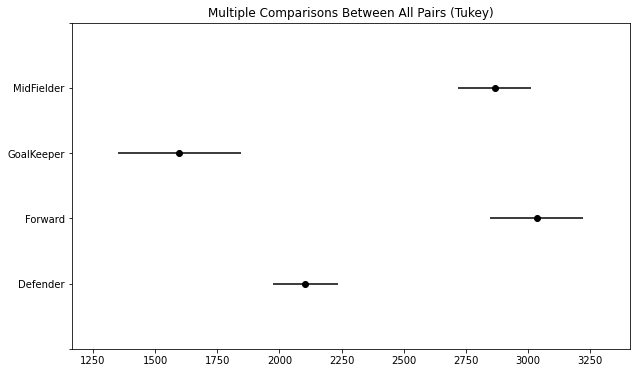

In [13]:
mc = MultiComparison(data = fifa['Value'], groups=fifa['Position_class'])
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous()

In [14]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Defender,Forward,930.373,0.0,610.7412,1250.0048,True
Defender,GoalKeeper,-507.3848,0.0034,-887.6281,-127.1415,True
Defender,MidFielder,760.8787,0.0,486.7109,1035.0465,True
Forward,GoalKeeper,-1437.7579,0.0,-1865.9257,-1009.59,True
Forward,MidFielder,-169.4944,0.5691,-507.0009,168.0122,False
GoalKeeper,MidFielder,1268.2635,0.0,872.8761,1663.6509,True


Forward와 Midfielder를 제외한 모든 변수간에 차이가 있다고 판단했다. 즉, 거의 모든 변수들에 차이가 존재한다고 판단한다.

4. Preferred Foot(주로 사용하는 발)과 Position_class에 따라 Value의 차이가 있는지를 알아보기 위해 이원배치분산분석을 수행하고 결과를 해석하시오.

- 귀무가설1 : Preferred Foot과 Position_class 변수의 상호작용 효과가 없다.
- 귀무가설2 : Preferred Foot에 따른 종속변수의 값에는 차이가 없다.
- 귀무가설3 : Position_Class에 따른 종속변수의 값에는 차이가 없다.
- 대립가설1 : Preferred Foot과 Position_Class 변수의 상호작용 효과가 있다.
- 대립가설2 : Preferred Foot에 따른 종속변수의 값에는 차이가 있다.
- 대립가설3 : Position_Class에 따른 종속변수의 값에는 차이가 있다.

In [16]:
anova_data = fifa[['Position_class', 'Preferred_Foot', 'Value']]
anova_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16642 entries, 0 to 16641
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Position_class  16642 non-null  object
 1   Preferred_Foot  16642 non-null  object
 2   Value           16642 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 390.2+ KB


In [17]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'Value ~ C(Preferred_Foot) + C(Position_class) + C(Preferred_Foot) : C(Position_class)'
model = ols(formula, anova_data).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Preferred_Foot),1.522715e+08,1.0,4.691332,3.032930e-02
C(Position_class),4.087367e+09,3.0,41.975902,5.151392e-27
C(Preferred_Foot):C(Position_class),4.736156e+08,3.0,4.863874,2.207249e-03
Residual,5.399071e+11,16634.0,NaN,NaN


- Preferred_Foot 변수의 종속변수에 미치는 영향을 검정한 결과, p-value가 0.05보다 작으므로 귀무가설을 기각한다. 따라서 Preferred_Foot에 따른 Value 차이가 존재한다고 판단
- Position_class 변수의 종속변수에 미치는 영향을 검정한 결과, p-value가 0.05보다 작으므로 귀무가설을 기각한다. 따라서 Position_class에 따른 Value 차이가 존재한다고 판단
- 두 변수의 교호작용에 대해 검정한 결과 p-value가 0.05보다 작으므로 귀무가설을 기각한다. 따라서 두 변수에서 교호작용이 존재한다는 것을 알 수 있다.

5. Age, Overall, Wage, Height_cm, Weight_lb가 Value에 영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula='Value ~ Age + Overall + Wage + Height_cm + Weight_lb', data=fifa)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 1.258e+04
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:11:12   Log-Likelihood:            -1.5458e+05
No. Observations:               16642   AIC:                         3.092e+05
Df Residuals:                   16636   BIC:                         3.092e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9018.2165    681.645    -13.230      0.000   -1.04e+04   -7682.119
Age         -201.2516      5.030    -40.010      0.000    -211.111    -191.392
Overall      241.6286      4.013     60.213      0.000     233.763     249.494
Wage         184.1729      1.128    163.298      0.000     181.962     186.384
Height_cm     -5.0167      4.743     -1.058      0.290     -14.314       4.280
Weight_lb     -1.9622      2.064     -0.951      0.342      -6.007       2.083
==============================================================================
Omnibus:                    17088.175   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3525415.526
Skew:                           4.665   Prob(JB):                         0.00
Kurtosis:                      73.690   Cond. No.                     8.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# 다중공선성 파악
fifa[['Age','Overall', 'Wage', 'Height_cm', 'Weight_lb']].corr()

,Age,Overall,Wage,Height_cm,Weight_lb
Age,1.000000,0.464903,0.148563,0.085335,0.232524
Overall,0.464903,1.000000,0.573953,0.038583,0.154307
Wage,0.148563,0.573953,1.000000,0.020167,0.065241
Height_cm,0.085335,0.038583,0.020167,1.000000,0.755261
Weight_lb,0.232524,0.154307,0.065241,0.755261,1.000000


In [22]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y,X = dmatrices('Value ~ Age + Overall + Wage + Height_cm + Weight_lb', data=fifa, return_type='dataframe')

#독립변수끼리의 VIF값을 계산하여 데이터프레임으로 반환
vif_list = []
for i in range(1,len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])

pd.DataFrame(vif_list, columns = ['vif', 'variable'])

,vif,variable
0,1.367758,Age
1,1.922019,Overall
2,1.532333,Wage
3,2.385914,Height_cm
4,2.510890,Weight_lb


In [29]:
import time 
import itertools

def processSubset(X,y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic
    return {'model':regr, 'AIC':AIC}

#전진선택법
def forward(X,y,predictors):
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(X=X, y=y, feature_set=predictors + [p] + ['Intercept']))
        
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].argmin()]
    print('Proceed', models.shape[0], 'models on', len(predictors)+1, 'predictors in')
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model[0])
    return best_model

#후진소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y=y, feature_set=list(combo) + ['Intercept']))
    
    models = pd.DataFrame(results)
    best_model= models.loc[models['AIC'].argmin()]
    toc = time.time()
    
    print('Processed', models.shape[0], 'models on', len(predictors)-1, 'predictors in', (toc-tic))
    print('Selected predictors:', best_model['model'].model.exog_names,
          'AIC:', best_model[0])
    return best_model

#단계적 선택법
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=['AIC','model'])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y, predictors+['Intercept'])['AIC']
    
    for i in range(1, len(X.columns.difference(['Intercept']))+1):
        Forward_result = forward(X=X, y=y, predictors=predictors)
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k!= 'Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        
        if Backward_result['AIC'] < Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k!='Intercept']
            print('backward')
            
        if Stepmodels.loc[i]['AIC'] > Smodel_before:
            break
        
        else:
            Smodel_before = Stepmodels.loc[i]['AIC']
            
    toc = time.time()
    print('Total elapsed time : ',(toc-tic), 'seconds') 
    
    return (Stepmodels['model'][len(Stepmodels['model'])])       

In [30]:
Stepwise_best_model = Stepwise_model(X=X,y=y)

Proceed 5 models on 1 predictors in
Selected predictors: ['Wage', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED502DFB80>
forward
Processed 1 models on 0 predictors in 0.003031015396118164
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED502DF250>
Proceed 4 models on 2 predictors in
Selected predictors: ['Wage', 'Overall', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED36E7BAF0>
forward
Processed 2 models on 1 predictors in 0.004906177520751953
Selected predictors: ['Wage', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED36E79E70>
Proceed 3 models on 3 predictors in
Selected predictors: ['Wage', 'Overall', 'Age', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001ED502DFC40>
forward
Processed 3 models on 2 predi

In [31]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 1.572e+04
Date:                Mon, 29 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:49:13   Log-Likelihood:            -1.5458e+05
No. Observations:               16642   AIC:                         3.092e+05
Df Residuals:                   16637   BIC:                         3.092e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Wage         184.1837      1.128    163.317      0.000     181.973     186.394
Overall      241.3450      4.002     60.310      0.000     233.501     249.189
Age         -202.1603      4.938    -40.936      0.000    -211.840    -192.480
Height_cm     -8.4446      3.082     -2.740      0.006     -14.486      -2.403
Intercept  -8690.8178    588.280    -14.773      0.000   -9843.908   -7537.727
==============================================================================
Omnibus:                    17089.038   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3525378.426
Skew:                           4.665   Prob(JB):                         0.00
Kurtosis:                      73.690   Cond. No.                     5.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Wage, Overall, Age, Height_cm이 포함된 다중 선형 회귀모델을 선택하였다. R2값이 0.791로 모델이 전체 데이터의 약 79%를 설명할 수 있다. 
- 회귀식 : y = 184.18 Wage + 241.35 Overall - 202.16 Age - 8.44 Height_cm - 8690.82
- 회귀식에서 가장 큰 영향을 주는 변수는 Overall이라고 할 수 있다. 